In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:

def find_top_left_pixel(img,img_size):
    stop=0
    for i in range(img_size[0]):
        for j in range(img_size[1]):
            if img[i][j] == 1:
                top_left_x=i
                top_left_y=j
                stop=1
                break
        if stop:
            break
    
    return top_left_x , top_left_y



In [3]:
def apply_border_tracing(img,top_left_x,top_left_y, img_size):
    
    new_img=np.zeros(img_size)
    new_img[top_left_x,top_left_y]=1
    Dir=3
    pixel =1
    curr_pixel=1
    x_pos=top_left_x
    y_pos=top_left_y
    Ps=[(top_left_x,top_left_y)]

    while(pixel):
        Dirs={0:(x_pos   , y_pos+1),
              1:(x_pos-1 , y_pos  ),
              2:(x_pos   , y_pos-1),
              3:(x_pos+1 , y_pos  )}

        Dir = (Dir+3) % 4    
        x_pos_nw , y_pos_nw = Dirs[Dir][0] , Dirs[Dir][1]
        curr_pixel=1
        while(curr_pixel):

            x_pos_nw , y_pos_nw =Dirs[Dir][0],Dirs[Dir][1]

            if img[x_pos_nw][y_pos_nw] == 1:


                x_pos = x_pos_nw
                y_pos = y_pos_nw

                new_img[x_pos][y_pos] = 1

                Ps.append((x_pos,y_pos))
                curr_pixel=0

            else:
                Dir=(Dir+1)%4


        if(len(Ps) > 2 and Ps[0]==Ps[-2] and Ps[1]==Ps[-1]):
            pixel=0

    return new_img

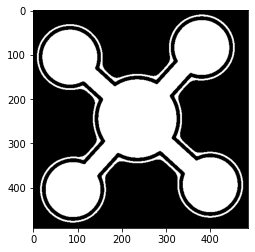

In [7]:
image = cv2.imread("circles.png")
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_,img= cv2.threshold(img_gray,178,255,cv2.THRESH_BINARY_INV)
img= cv2.medianBlur(img,5)
plt.imshow(img, cmap="gray")
img = cv2.resize(img, (0, 0), fx=1, fy=1)/255
plt.imshow(img, cmap="gray")


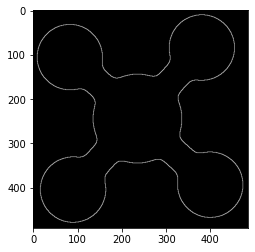

In [8]:
img_size=np.shape(img)
top_left_x_pos,top_left_y_pos = find_top_left_pixel(img,img_size)

            
new_img=apply_border_tracing(img,top_left_x_pos,top_left_y_pos,img_size)
plt.imshow(new_img, cmap="gray")